In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [129]:
melb_data = pd.read_csv("c:/Users/Userpc/Desktop/Projects/ML Shortcuts/Linear Regression/melb_data.csv")

In [130]:
melb_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [131]:
melb_data.drop(["CouncilArea", "Regionname", "Propertycount", "Suburb", "Address", "SellerG", "Date"], axis=1, inplace=True)

In [132]:
melb_data.select_dtypes("object").nunique()

Type      3
Method    5
dtype: int64

In [133]:
X = melb_data.drop("Price", axis=1)
y = melb_data["Price"]
X.dtypes

Rooms             int64
Type             object
Method           object
Distance        float64
Postcode        float64
Bedroom2        float64
Bathroom        float64
Car             float64
Landsize        float64
BuildingArea    float64
YearBuilt       float64
Lattitude       float64
Longtitude      float64
dtype: object

In [134]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# OH_encoder = OneHotEncoder(handle_unknown='ignore')

# X_encoded = pd.DataFrame(OH_encoder.fit_transform(X[["Type", "Method"]]))

# X_encoded.index = X.index
# num_X = X.drop(["Type", "Method"], axis=1)
# X = pd.concat([num_X, X_encoded], axis=1)
# X.columns = X.columns.astype(str)


In [135]:
from sklearn.base import TransformerMixin

X["Car"] = X["Car"].fillna(0)

categorical_cols = ["Type", "Method"]
numerical_cols = X.columns.difference(categorical_cols)

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

# X["Car"] = X["Car"].fillna(0)

# imputer = SimpleImputer(strategy='mean')

# X["BuildingArea"] = imputer.fit_transform(X[["BuildingArea"]])
# X["YearBuilt"] = imputer.fit_transform(X[["YearBuilt"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)

In [136]:
absolute_percentage_error = np.abs((y_test - pred) / y_test) * 100

mape = np.mean(absolute_percentage_error)

mape

21.96483206600583

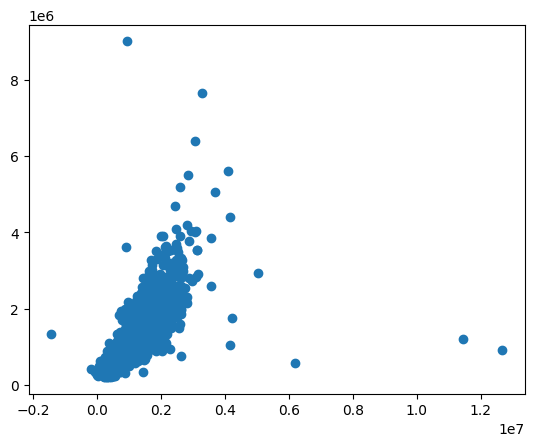

In [137]:
plt.scatter(pred, y_test)